# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [3]:
import numpy as np
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# A.1:
# Joint External Debt Hub de WBdata. Vamos a estar comparando los SDR Holdings de ambos paises y qué porcentaje /
# ocupan en las reservas de sus bancos centrales (Excluyendo el oro).
indicadores = {'Q.1C0.1C0.D.9B.MOA.SDHO.1.ALL.MV.SDR.IFI': "SDR Holdings",
               'Q.1C0.1C0.C.9A.MOA.RXGT.1.ALL.MV.TO1.ALL': "Reservas"}
# Las "SDR holdings" indican la cantidad de DEG (Derechos Especiales de Giro) que posee una entidad, generalmente un /
# banco central, como parte de sus reservas internacionales. Esto sirve como una herramienta para complementar las reservas /
# y ayudar a estabilizar la balanza de pagos.


data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])

# Todas las unidades estan expresadas en mil millones de dólares.
data = data / 1000000000

dataf = pd.DataFrame(data=data)

dataf.reset_index(inplace=True)
dataf = dataf.set_index('date')
dataf.index.name = "Fecha"

df = dataf[dataf.index.astype(str).str.contains(
    "Q1") & dataf.index.astype(str).str.contains("20")]
# Analizamos a partir del 2000, el primer trimestre de cada año.
df['Proporcion'] = (df['SDR Holdings']/df['Reservas'] * 100).round(2)
df['Proporcion'] = df['Proporcion'].astype(str) + '%'
# Porcentaje de SDR Holdings en las reservas del banco central.

df = df.rename(columns={"country": "Pais"})

print(df)
print("---------------------------")


                 Pais  SDR Holdings    Reservas Proporcion
Fecha                                                     
2024Q1      Argentina      0.885488   22.741634      3.89%
2023Q1      Argentina      5.052850   35.142855     14.38%
2022Q1      Argentina      6.781493   39.277010     17.27%
2021Q1      Argentina      1.023045   36.052663      2.84%
2020Q1      Argentina      2.195423   40.534171      5.42%
2019Q1      Argentina      3.322444   63.774752      5.21%
2018Q1      Argentina      2.595021   59.691431      4.35%
2017Q1      Argentina      2.422539   48.573454      4.99%
2016Q1      Argentina      2.892431   27.093731     10.68%
2015Q1      Argentina      2.832241   29.113711      9.73%
2014Q1      Argentina      3.173320   24.424020     12.99%
2013Q1      Argentina      3.077965   37.232931      8.27%
2012Q1      Argentina      3.180376   43.964389      7.23%
2011Q1      Argentina      3.206186   48.827608      6.57%
2010Q1      Argentina      3.070181   45.497808      6.7

C:\Users\andre\AppData\Local\Temp\ipykernel_13036\3302339529.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Proporcion'] = (df['SDR Holdings']/df['Reservas'] * 100).round(2)
C:\Users\andre\AppData\Local\Temp\ipykernel_13036\3302339529.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Proporcion'] = df['Proporcion'].astype(str) + '%'


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [5]:
df_arg = df[df['Pais'] == 'Argentina']
df_usa = df[df['Pais'] == 'United States']

media_reservas_arg = np.mean(df_arg['Reservas']).round(3)
media_reservas_usa = np.mean(df_usa['Reservas']).round(3)
print(f'Media de las reservas de Argentina: {media_reservas_arg}')
print(f'Media de las reservas de U.S.A: {media_reservas_usa}')

media_sdrholdings_arg = np.mean(df_arg['SDR Holdings']).round(3)
media_sdrholdings_usa = np.mean(df_usa['SDR Holdings']).round(3)
print(f'Media de los SDR Holdings de Argentina: {media_sdrholdings_arg}')
print(f'Media de los SDR Holdings de U.S.A: {media_sdrholdings_usa}')


mediana_reservas_arg = np.median(df_arg['Reservas']).round(3)
mediana_reservas_usa = np.median(df_usa['Reservas']).round(3)
print(f'Mediana de las reservas de Argentina: {mediana_reservas_arg}')
print(f'Mediana de las reservas de U.S.A: {mediana_reservas_usa}')

mediana_sdrholdings_arg = np.median(df_arg['SDR Holdings']).round(3)
mediana_sdrholdings_usa = np.median(df_usa['SDR Holdings']).round(3)
print(f'Mediana de los SDR Holdings de Argentina: {mediana_sdrholdings_arg}')
print(f'Mediana de los SDR Holdings de U.S.A: {mediana_sdrholdings_usa}')

varianza_res_usa = np.var(df_usa["Reservas"], ddof=1)
varianza_res_arg = np.var(df_arg["Reservas"], ddof=1)
desvio_res_usa = np.sqrt(varianza_res_usa).round(3)
desvio_res_arg = np.sqrt(varianza_res_arg).round(3)
print(f'El desvio de las reservas de U.S.A es: {desvio_res_usa}')
print(f'El desvio de las reservas de ARG es: {desvio_res_arg}')

varianza_sdr_usa = np.var(df_usa["SDR Holdings"], ddof=1)
varianza_sdr_arg = np.var(df_arg["SDR Holdings"], ddof=1)
desvio_sdr_usa = np.sqrt(varianza_sdr_usa).round(3)
desvio_sdr_arg = np.sqrt(varianza_sdr_arg).round(3)
print(f'El desvio de los SDR Holdings de ARG es: {desvio_sdr_arg}')
print(f'El desvio de los SDR Holdings de U.S.A es: {desvio_sdr_usa}')


Media de las reservas de Argentina: 34.237
Media de las reservas de U.S.A: 111.007
Media de los SDR Holdings de Argentina: 2.103
Media de los SDR Holdings de U.S.A: 49.139
Mediana de las reservas de Argentina: 35.651
Mediana de las reservas de U.S.A: 108.686
Mediana de los SDR Holdings de Argentina: 2.423
Mediana de los SDR Holdings de U.S.A: 50.136
El desvio de las reservas de U.S.A es: 55.32
El desvio de las reservas de ARG es: 14.326
El desvio de los SDR Holdings de ARG es: 1.668
El desvio de los SDR Holdings de U.S.A es: 47.885


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

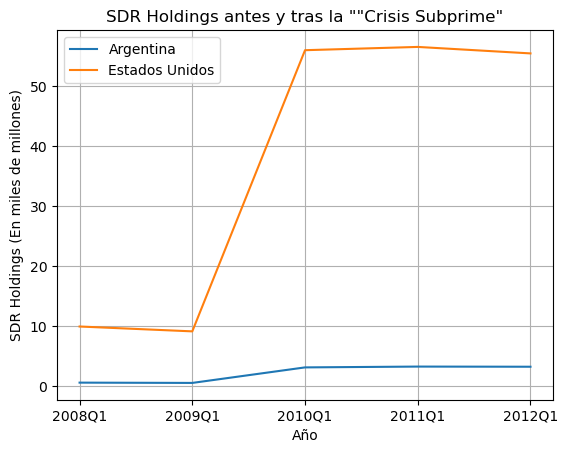

In [7]:
df_reset = (df.groupby(by=["Fecha", "Pais"]).agg(
    {"SDR Holdings": "sum"})).reset_index()
df_2008_2012 = df_reset.iloc[16:26] #Seleccionamos desde el 2008 hasta el 2012
df_arg2 = df_2008_2012[df_2008_2012['Pais'] == "Argentina"]
df_usa2 = df_2008_2012[df_2008_2012['Pais'] == "United States"]

x1 = df_arg2['Fecha'] #Definimos las variables
y1 = df_arg2['SDR Holdings']
x2 = df_usa2['Fecha']
y2 = df_usa2['SDR Holdings'] 

plt.plot(x1, y1, label="Argentina")
plt.plot(x2, y2, label="Estados Unidos")

plt.xlabel("Año")
plt.ylabel("SDR Holdings (En miles de millones)")
plt.title('SDR Holdings antes y tras la ""Crisis Subprime"')

plt.legend()
plt.grid(True) #Aplicamos una grilla
plt.show()


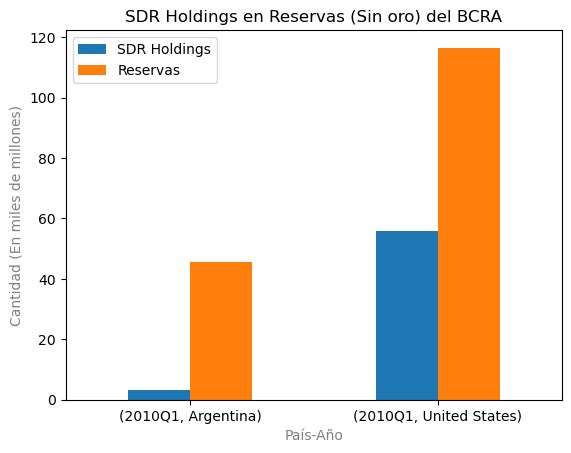

In [9]:
df_2009 = df[df.index.astype(str).str.contains(
    "2010Q1")].reset_index().set_index(["Fecha", "Pais"]) #Reseteamos index y lo definimos para "Fecha" y "País"
ax = df_2009.plot(
    kind='bar', title="SDR Holdings en Reservas (Sin oro) del BCRA")
ax.set_xlabel('País-Año', color='grey')
ax.set_ylabel('Cantidad (En miles de millones)', color='grey') #Definimos las variables
ax.tick_params(axis="x", rotation=0)
ax.legend(["SDR Holdings", "Reservas"])
plt.show()


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [13]:
# Importamos las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de El Destape
url = "https://www.eldestapeweb.com/"

# Hacemos la solicitud a la página para traiga el contenido del HTML
r = requests.get(url)
contenido = r.content
soup = BeautifulSoup(contenido, "html.parser")

# Lista para almacenar los links de las noticias
links = []

# Extraemos los enlaces de las noticias. Buscamos todas las etiquetas <h2> (etiqueta que contiene los títulos y dentro de ella se encuentran los enlaces)
for h2_element in soup.find_all("h2"):  
    link = h2_element.find("a", href=True)  # Buscamos la etiqueta <a> dentro del <h2>. Usamos href que es el atributo de los enlaces <a> que contiene la URL.
    
    if link:  # Si existe <a> dentro de <h2>
        href = link["href"] 
        
        # Verificamos que el enlace sea relativo y lo convertimos en absoluto
        if href.startswith("/"):
            full_link = "https://www.eldestapeweb.com" + href  #Concatenamos el dominio de la página con la URL obtenida
            links.append(full_link)  # Agregamos el link a la lista creada.

# Creamos un DataFrame con los enlaces
df = pd.DataFrame({"Links": links})

# Exportamos los links a un archivo de Excel
df.to_excel("noticias_eldestape.xlsx", index=False)

#Abrimos el archivo de Excel
pd.read_excel("noticias_eldestape.xlsx")


,Links
0,https://www.eldestapeweb.com/internacionales/e...
1,https://www.eldestapeweb.com/politica/escandal...
2,https://www.eldestapeweb.com/politica/marcha-j...
3,https://www.eldestapeweb.com/politica/paro/san...
4,https://www.eldestapeweb.com/economia/crisis-e...
...,...
109,https://www.eldestapeweb.com/internacionales/e...
110,https://www.eldestapeweb.com/sociedad/jubilado...
111,https://www.eldestapeweb.com/cultura/folklore/...
112,https://www.eldestapeweb.com/deportes/julian-a...
